<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Session_4_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


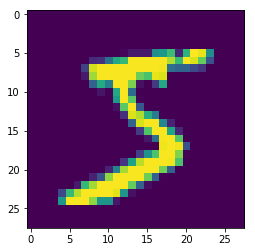

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(10, 3, 3, activation='relu'))

model.add(Conv2D(10, 3, 3, activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(10, 1, 1, activation='relu'))

model.add(Conv2D(10, 3, 3, activation='relu'))

model.add(Conv2D(16, 3, 3, activation='relu'))

model.add(Conv2D(16, 3, 3, activation='relu'))

model.add(Conv2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Upd

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 10)        110       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 16)          1456      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.2218 - acc: 0.9291
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0758 - acc: 0.9770
Epoch 3/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0589 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0484 - acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0412 - acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0350 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0323 - acc: 0.9902
Epoch 8/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.0286 - acc: 0.9908
Epoch 9/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0259 - acc: 0.9921
Epoch 10/10
60000/60000 [==============================] - 12s 203us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score)

[0.038167335778247796, 0.9878]


In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[2.59971489e-09 1.73152117e-07 1.90205310e-06 1.18914772e-06
  7.26197965e-12 1.64903317e-11 3.20768156e-19 9.99996424e-01
  9.52124005e-11 3.39874191e-07]
 [4.06633838e-10 1.76862088e-07 9.99999881e-01 1.53828242e-10
  2.64484629e-10 2.46943481e-12 2.32978756e-08 2.81271095e-08
  2.47467224e-09 3.96734816e-14]
 [6.95270330e-09 9.99920487e-01 8.08920049e-06 1.11358951e-07
  3.60952595e-06 3.20079962e-05 1.26067034e-05 2.02000156e-05
  2.80276595e-06 3.47848719e-08]
 [9.99340236e-01 2.13362019e-11 2.43608019e-06 1.52471875e-06
  4.55240290e-08 5.23556373e-04 1.07358726e-04 7.46174464e-06
  1.71729243e-05 2.62132886e-07]
 [6.28057550e-10 1.07962745e-11 2.37393244e-10 1.21258836e-09
  9.99995708e-01 6.03948613e-10 3.70860481e-10 2.34539280e-11
  3.19082916e-09 4.28073508e-06]
 [1.58244653e-08 9.99932647e-01 7.19866966e-06 1.95316616e-08
  4.46580134e-06 1.19176138e-06 4.02513797e-06 4.92050494e-05
  1.16668730e-06 5.78206727e-09]
 [3.00384527e-13 9.45285876e-08 1.69971912e-07 1.25064417e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

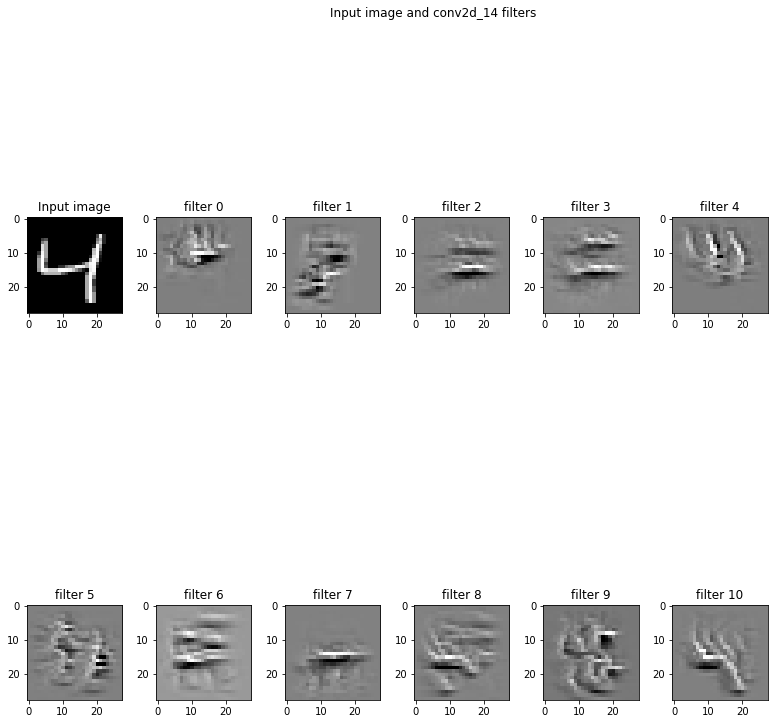

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()